# Data Citra

## Load Data

In [43]:
# Import Library
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import zipfile
import os

import random
from tensorflow.keras.preprocessing.image import load_img

In [45]:
# Download Dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-11-28 07:38:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.207, 74.125.195.207, 172.253.117.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   190MB/s    in 0.3s    

2024-11-28 07:38:38 (190 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [46]:
# Ekstrak Dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [47]:
# Definisikan path untuk data train dan data validation
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

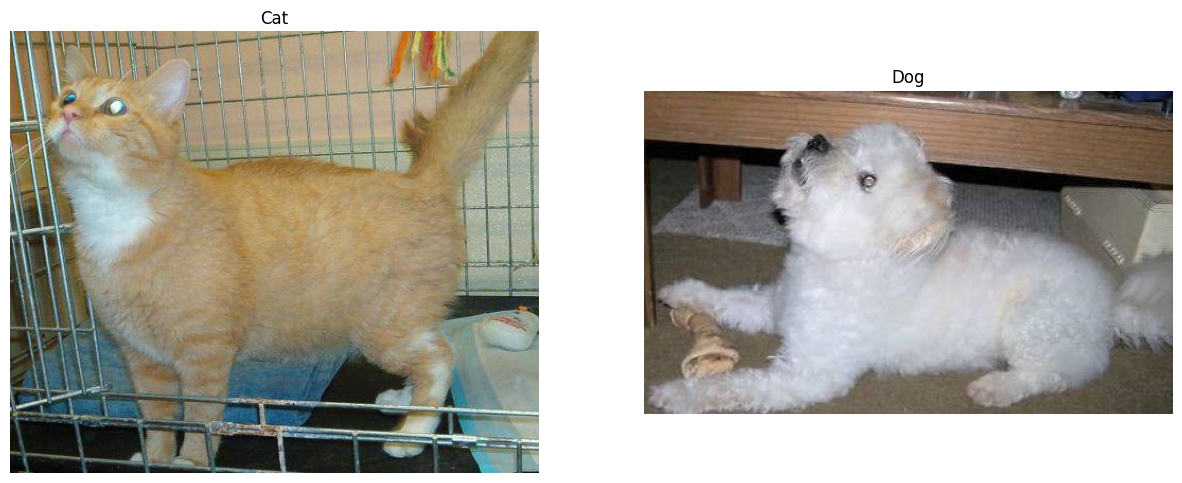

In [49]:
# Menampilkann data citra dari dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

sample_cat = random.choice(os.listdir(train_dir + "/cats"))
image = load_img(train_dir + "/cats/" + sample_cat)
ax[0].imshow(image)
ax[0].set_title("Cat")
ax[0].axis("Off")

sample_dog = random.choice(os.listdir(train_dir + "/dogs"))
image = load_img(train_dir + "/dogs/" + sample_dog)
ax[1].imshow(image)
ax[1].set_title("Dog")
ax[1].axis("Off")

plt.show()

## PREPROCESSING DAN AUGMENTASI

In [50]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rescale=1./255,           # Rescalling Image menjadi 1./255
                rotation_range=30,        # Rotasi Image kurang lebih 30 derajat secara random
                zoom_range=0.2,           # Perbesar Image secara horizontal
                horizontal_flip=True,     # Flip Image  secara horizontal
                fill_mode='nearest')

# Implementasi ImageDataGenerator pada train_data
train_gen = train_datagen.flow_from_directory(train_dir,                  # Direktori data
                                              target_size=(150, 150),     # Target size Image
                                              shuffle=True,               # Menerapkan pengacakan pada image
                                              batch_size=32,              # Menerapkan batch size
                                              class_mode='binary')        # Menerapkan mode kelas

Found 2000 images belonging to 2 classes.


In [51]:
datagen = ImageDataGenerator(rescale=1./255,)
val_gen = datagen.flow_from_directory(validation_dir,
                                          target_size=(150, 150),
                                          batch_size=32,
                                          class_mode='binary')

print('Batches train=%d, validation=%d' % (len(train_gen), len(val_gen)))

Found 1000 images belonging to 2 classes.
Batches train=63, validation=32


## Modelling

In [52]:
# Import Library
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam

In [53]:
# Load model ResNet101, kemudian potong bagian Top atau Fullt Connected Layernya
baseModel = ResNet101(
    weights="imagenet",
    input_tensor=Input(shape=(150, 150, 3)),
    include_top=False
    )

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [54]:
# Freeze baseModel karena sudah dilakukan training
baseModel.trainable = False

In [55]:
# Membuat Fully Connected
x = baseModel.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=baseModel.input, outputs=outputs)

In [56]:
# Compile Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# Training Transfer Learning Model ResNet101
history = model.fit(train_gen,epochs=20,validation_data=val_gen)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 53s 525ms/step - accuracy: 0.5086 - loss: 1.6876 - val_accuracy: 0.6130 - val_loss: 0.6621
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 260ms/step - accuracy: 0.5742 - loss: 0.6774 - val_accuracy: 0.6530 - val_loss: 0.6547
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 271ms/step - accuracy: 0.6150 - loss: 0.6624 - val_accuracy: 0.6590 - val_loss: 0.6371
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 254ms/step - accuracy: 0.6286 - loss: 0.6499 - val_accuracy: 0.6490 - val_loss: 0.6273
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 252ms/step - accuracy: 0.6325 - loss: 0.6422 - val_accuracy: 0.6650 - val_loss: 0.6175
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - accuracy: 0.6183 - loss: 0.6568 - val_accuracy: 0.6740 - val_loss: 0.6101
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 253ms/step - accuracy: 0.6269 - loss: 0.6292 - val_accuracy: 0.6210 - val_loss: 0.6437
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 255ms/step - accuracy: 0.6393 - loss: 0.6420 - val_accuracy: 0.678

## Hasil Evaluasi

In [58]:
# Tampilkan Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(val_gen)
y_pred = (y_pred > 0.5).astype(int)

target_names = ['cats', 'dogs']

print('Classification Report')
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step
Classification Report
              precision    recall  f1-score   support

        cats       0.51      0.52      0.51       500
        dogs       0.51      0.50      0.50       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

 6/32 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step

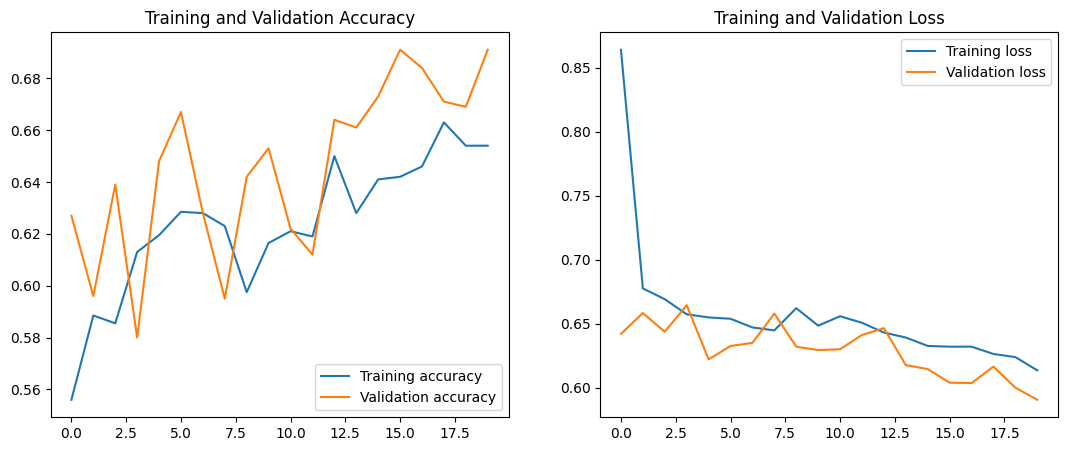

In [15]:
# Visualisasikan accuracy, val_accuracy, loss, dan val_loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Text

## Load Data

In [1]:
# Install library transformers
!pip install transformers

In [38]:
# Import Library
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [39]:
data = [
    ("This is a positive sentence.", 1),
    ("I didn't like this movie.", 0),
    ("The weather is great today.", 1),
    ("The food was terrible.", 0),
    ("I love this, sounds like Disney Song.", 1),
    ("It is gross, I don't like this.", 0),
    ("You break my heart, break my hope.", 0),
    ("So bad and it is not good for my mental health.", 0),
    ("I like it, so amazing point.", 1),
    ("Love the sentences so much, so good.", 1),
]

texts, labels = zip(*data)

## PREPROCESSING & SPLITTING DATA

In [40]:
# Membagi dataset menjadi data latih dan data uji
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [41]:
# Menggunakan tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [42]:
# Membuat dataset Tensorflow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
))

## MODELLING

In [ ]:
# Memuat model BERT
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

In [8]:
# Proses Pelatihan
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer='adam', loss=model.hf_compute_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16), epochs=20, batch_size=16)

Epoch 1/20
1/1 [==============================] - 53s 53s/step - loss: 0.7046 - accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 94ms/step - loss: 0.6605 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 90ms/step - loss: 0.9352 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 93ms/step - loss: 1.9260 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 85ms/step - loss: 0.9621 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 74ms/step - loss: 0.6973 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 76ms/step - loss: 1.3556 - accuracy: 0.5000
Epoch 8/20
1/1 [==============================] - 0s 75ms/step - loss: 0.8181 - accuracy: 0.5000
Epoch 9/20
1/1 [==============================] - 0s 71ms/step - loss: 0.7279 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 0s 76ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 11/20
1/1 [============

## HASIL EVALUASI

In [9]:
# Evaluasi Model
loss, accuracy = model.evaluate(test_dataset.batch(16))
print("Akurasi:", accuracy)
print("Loss:", loss)

1/1 [==============================] - 3s 3s/step - loss: 0.7248 - accuracy: 0.5000
Akurasi: 0.5
Loss: 0.7247804403305054


In [10]:
# Prediksi Model
predictions = model.predict(test_dataset.batch(16))
predicted_labels = tf.argmax(predictions.logits, axis=1)

1/1 [==============================] - 2s 2s/step


In [11]:
# Menampilkan Classification Report
target_names = ['Negative', 'Positive']
print(classification_report(test_labels, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.50      1.00      0.67         1
    Positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Data Tabular

## Load Data

In [23]:
# Import Library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [24]:
# Collect Data
data = {
    'X1' : [1.2, 2.0, -0.5, -2.0, 3.0, 0.5, -1.0, 2.5],
    'X2' : [0.8, 3.5, 2.0, -1.5, -1.0, -2.5, 1.0, -3.0],
    'label' : [0, 0, 1, 1, 0, 1, 1, 0]
}

In [25]:
!pip install pytorch-tabnet

In [26]:
df = pd.DataFrame(data)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [27]:
# Menggunakan pustaka Tabnet

from pytorch_tabnet.tab_model import TabNetClassifier

clf = TabNetClassifier()
clf.fit(
    X_train=train_df.drop('label', axis=1).values,
    y_train=train_df['label'].values,
    eval_set=[(train_df.drop('label', axis=1).values, train_df['label'].values),
              (test_df.drop('label', axis=1).values, test_df['label'].values)],
    # eval_name=['train', 'test'],
    # eval_metric=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 1  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 2  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 3  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 4  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 5  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 6  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 7  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 8  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 9  | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s
epoch 10 | loss: 0.0     | val_0_auc: 1.0     | val_1_auc: 1.0     |  0:00:00s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_1_auc = 1.0


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [30]:
predictions = clf.predict_proba(test_df.drop('label', axis=1).values)[:, 1]

# Mengkonversi prediksi menjadi label (0 atau 1)
predicted_labels = np.round(predictions).astype(int)

# Hasil Prediksi
print("Hasil Prediksi:", predicted_labels)

Hasil Prediksi: [0 0]


In [31]:
# Classification Report
target_names = ['Class 0', 'Class 1']
print(classification_report(test_df['label'].values, predicted_labels, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      1.00      0.67         1
     Class 1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
